In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('shopping_data.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [6]:
model = AgglomerativeClustering(n_clusters = 7, linkage='average', affinity='cosine')

In [7]:
model.fit(data.iloc[:,[2,3,4]].values)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=7, pooling_func='deprecated')

In [8]:
target = model.labels_
target

array([3, 3, 2, 3, 5, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 6, 3, 1, 3,
       2, 3, 2, 3, 1, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 6, 3, 1, 4,
       1, 4, 1, 4, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 1, 1, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 1, 4, 4, 4, 1, 1, 1, 1, 4, 1, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4], dtype=int64)

In [9]:
import numpy as np
print(np.unique(model.labels_))

[0 1 2 3 4 5 6]


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [12]:
import collections
collections.Counter(target)

Counter({3: 22, 2: 12, 5: 1, 1: 60, 6: 2, 4: 65, 0: 38})

In [14]:
unique, counts = np.unique(target, return_counts=True)

In [15]:
unique

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [16]:
counts

array([38, 60, 12, 22, 65,  1,  2], dtype=int64)

(array([38., 60.,  0., 12.,  0., 22., 65.,  0.,  1.,  2.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

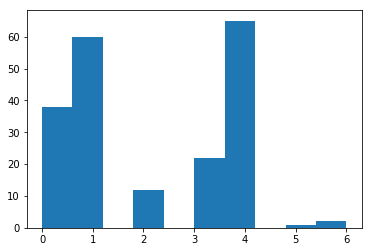

In [22]:
plt.hist(target)